IMPORTATION DE DONNEES

In [ ]:
import pandas as pd # Pour manipuler les données
import numpy as np # Pour les opérations numériques
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Pour la visualisation avancée
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neural_network import MLPRegressor




In [ ]:
df = pd.read_csv("dataset.csv")
df.fillna(0)
X = df.drop("t_epsilon", axis=1)
y = df[["t_epsilon"]]
df.head(10)



,L,m,theta0_rad,Tc,shape,fluid,dim1,dim2,t_epsilon,dim3
0,1.507481,0.956688,1.321814,0.008680,cylindre,air,0.375333,0.468048,101.702825,NaN
1,1.287720,1.955481,1.405724,0.007229,sphère,air,0.162198,NaN,523.114531,NaN
2,1.877950,4.828315,0.757731,0.002462,sphère,air,0.455437,NaN,879.124420,NaN
3,0.884587,2.358127,1.530066,0.001351,pavé,air,0.262616,0.256551,791.221978,0.392211
4,1.206593,3.870280,1.217885,0.003977,cylindre,air,0.110713,0.053281,1329.036918,NaN
5,1.177904,4.377064,0.390553,0.005606,pavé,air,0.034611,0.249150,761.421151,0.263566
6,1.454550,3.025028,1.493939,0.007296,cylindre,huile,0.082106,0.067608,18.100503,NaN
7,1.925426,1.149313,1.044090,0.001787,pavé,huile,0.347276,0.498754,3.300092,0.048417
8,0.733158,2.396120,1.472639,0.001591,sphère,air,0.378786,NaN,788.521903,NaN
9,0.918683,2.894953,1.264162,0.009820,sphère,huile,0.232817,NaN,2.100058,NaN


In [ ]:
# Encodage de la classe cible
le = LabelEncoder()
X['shape'] = le.fit_transform(X['shape'])
X['fluid'] = le.fit_transform(X['fluid'])
X.fillna(0, inplace=True)
X.head(10)


,L,m,theta0_rad,Tc,shape,fluid,dim1,dim2,dim3
0,1.507481,0.956688,1.321814,0.008680,0,0,0.375333,0.468048,0.000000
1,1.287720,1.955481,1.405724,0.007229,2,0,0.162198,0.000000,0.000000
2,1.877950,4.828315,0.757731,0.002462,2,0,0.455437,0.000000,0.000000
3,0.884587,2.358127,1.530066,0.001351,1,0,0.262616,0.256551,0.392211
4,1.206593,3.870280,1.217885,0.003977,0,0,0.110713,0.053281,0.000000
5,1.177904,4.377064,0.390553,0.005606,1,0,0.034611,0.249150,0.263566
6,1.454550,3.025028,1.493939,0.007296,0,2,0.082106,0.067608,0.000000
7,1.925426,1.149313,1.044090,0.001787,1,2,0.347276,0.498754,0.048417
8,0.733158,2.396120,1.472639,0.001591,2,0,0.378786,0.000000,0.000000
9,0.918683,2.894953,1.264162,0.009820,2,2,0.232817,0.000000,0.000000


ANALYSE DE DONNEES

<Figure size 1200x800 with 0 Axes>

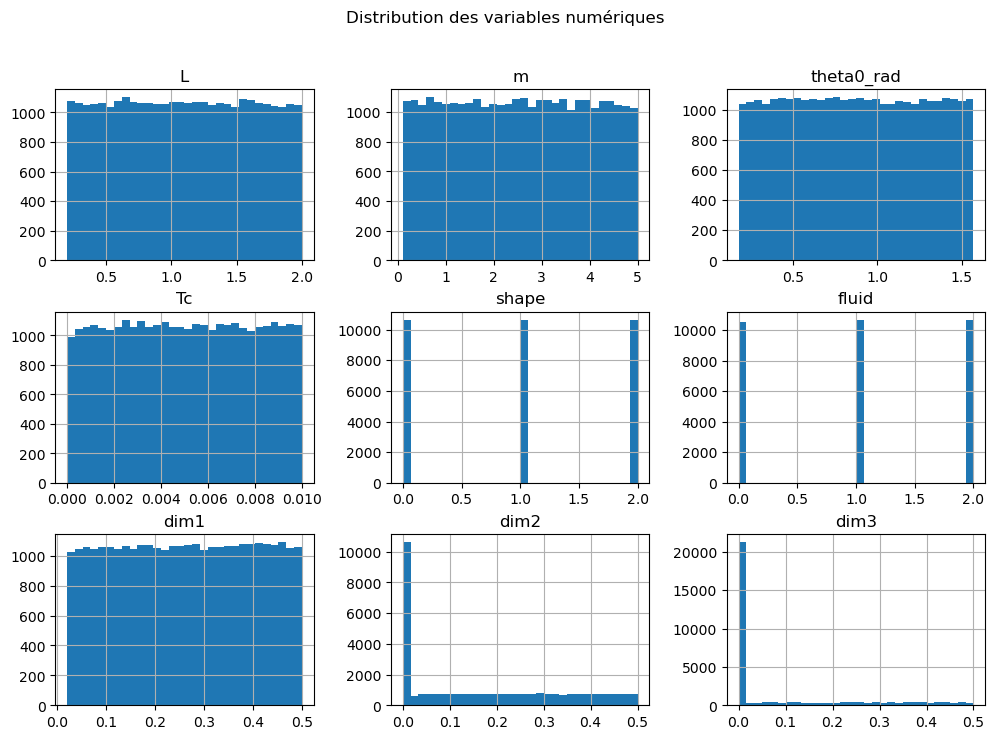

In [ ]:
plt.figure(figsize=(12, 8))
X.hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution des variables numériques")
plt.show()

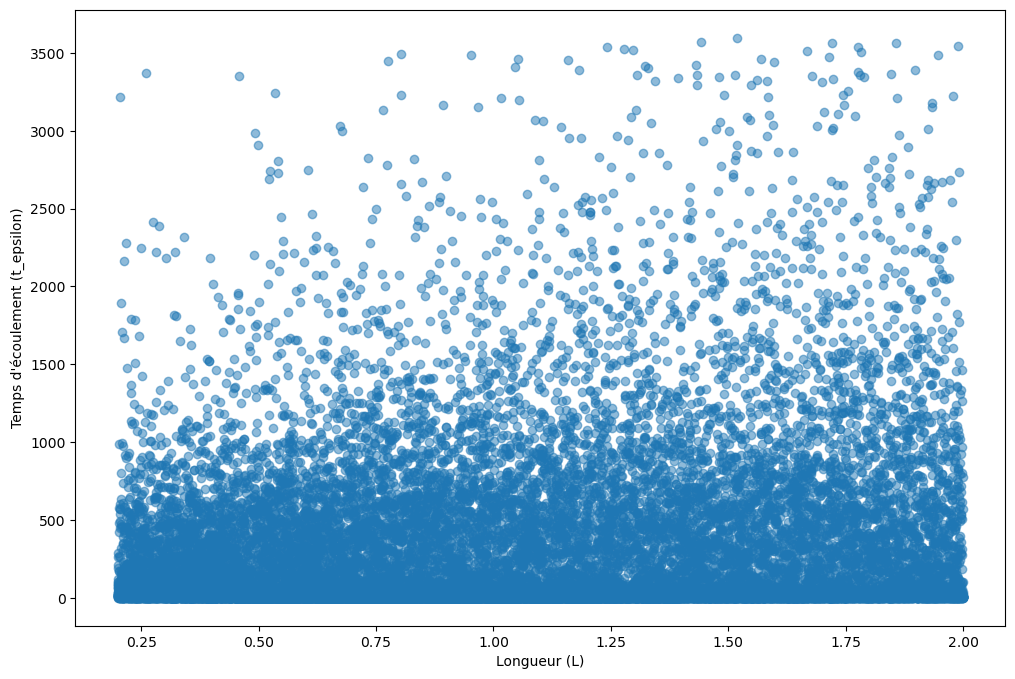

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(X['L'], y, 'o', alpha=0.5)
plt.xlabel('Longueur (L)')
plt.ylabel('Temps d\'écoulement (t_epsilon)')   
plt.show()

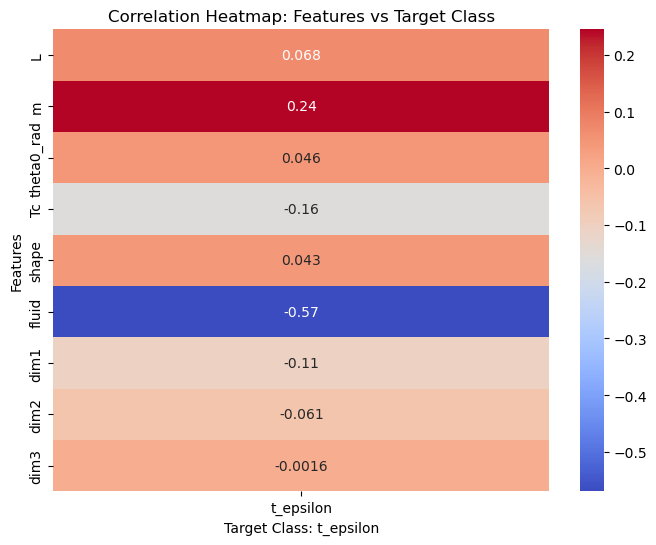

In [ ]:
# Calcul de la matrice de corrélation entre les features et la cible
df_corr = X.copy()
df_corr['t_epsilon'] = y['t_epsilon']
# Corrélation entre chaque feature et chaque classe cible

corr_matrix = df_corr.corr().loc[X.columns, ['t_epsilon']]

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Features vs Target Class')
plt.xlabel('Target Class: t_epsilon')
plt.ylabel('Features')  
plt.show()

PREPROCESSING

In [ ]:
df = pd.read_csv("dataset.csv").fillna(0)

fluid_density = {
    "eau": 1000,
    "air": 1.225,
    "huile": 900,
}

df["fluid"] = df["fluid"].map(fluid_density)
X = df.drop(columns=["t_epsilon"])
y = df["t_epsilon"]


import numpy as np

def calculate_volume(row):
    
    shape = row['shape']
    dim1, dim2, dim3 = row['dim1'], row['dim2'], row['dim3']
    
    if shape == 'sphère':
        # Volume sphère = (4/3) * π * r³
        # dim1 = rayon
        volume = (4/3) * np.pi * (dim1 ** 3)
        
    elif shape == 'cylindre':
        # Volume cylindre = π * r² * h
        # dim1 = rayon, dim2 = hauteur
        volume = np.pi * (dim1 ** 2) * dim2
        
    elif shape == 'pavé':
        # Volume pavé = longueur * largeur * hauteur
        # dim1 = longueur, dim2 = largeur, dim3 = hauteur
        volume = dim1 * dim2 * dim3
        
    else:
        volume = 0  # Cas par défaut

    return volume

X["volume"] = X.apply(calculate_volume, axis=1)

def calculate_surface(row):
    
    shape = row['shape']
    dim1, dim2, dim3 = row['dim1'], row['dim2'], row['dim3']
    
    if shape == 'sphère':
       
        volume =  np.pi * (dim1 ** 2)
        
    elif shape == 'cylindre':
       
        volume = np.pi * (dim1 * 2) * dim2
        
    elif shape == 'pavé':
       
        volume = dim1 * dim2 
        
    else:
        volume = 0  # Cas par défaut

    return volume

X["surface"] = X.apply(calculate_surface, axis=1)


cat_cols = ["shape"]
num_cols = X.columns.difference(cat_cols)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(columns=["shape"]))
X = pd.DataFrame(X_scaled, columns=X.columns.difference(["shape"]))
X["shape"] = df["shape"]



preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), cat_cols),
    ("num", "passthrough", num_cols)
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("nn", MLPRegressor(hidden_layer_sizes=(150, 100, 50),
                        max_iter=500,
                        random_state=42))
])





ENTRAINEMENT 

In [ ]:

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("R²:", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)   # calcul de l'erreur quadratique moyenne
rmse = np.sqrt(mse)                        # racine carrée
print("RMSE:", rmse)

R²: 0.9915747014517842
RMSE: 40.15340857398819


In [ ]:
# --- Sauvegarde du modèle ---
path = 'C:/Users/EEIA/Documents/pendulum'
joblib.dump(model, path + 'mlp_model_4_1.pkl')
print(f"Modèle enregistré sous: {path + 'mlp_model_4_1.pkl'}")

Soumission


In [ ]:
X_test_file = pd.DataFrame({'L':[1], 'm': [2], 'theta0_rad': [np.deg2rad(45)], 'Tc': [0.005], 'shape': ['sphère'], 'fluid': ['air'], 'dim1': [0.1], 'dim2': [0], 'dim3': [0]})

# Mapper la densité
X_test_file["fluid"] = X_test_file["fluid"].map(fluid_density)

# Ajouter volume et surface
X_test_file["volume"] = X_test_file.apply(calculate_volume, axis=1)
X_test_file["surface"] = X_test_file.apply(calculate_surface, axis=1)

# Standardiser les colonnes numériques comme pour l'entraînement
X_test_scaled = scaler.transform(X_test_file.drop(columns=["shape"]))
X_test_ready = pd.DataFrame(X_test_scaled, columns=X_test_file.columns.difference(["shape"]))
X_test_ready["shape"] = X_test_file["shape"]

# Prédictions
y_pred_submit = model.predict(X_test_ready)

# Sauvegarde CSV
result=pd.DataFrame({"t_epsilon": y_pred_submit})
print(result["t_epsilon"])
print("✅ Fichier 'submission.csv' créé avec succès !")


0    687.23375
Name: t_epsilon, dtype: float64
✅ Fichier 'submission.csv' créé avec succès !
